In [8]:
# import modules

import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
from geopy.distance import vincenty
import re
import statsmodels.formula.api as sm
%pylab inline

# load yelp API

from yelp.client import Client
from yelp.oauth1_authenticator import Oauth1Authenticator

# read API keys
with open('config_secret.json') as cred:
    creds = json.load(cred)
    auth = Oauth1Authenticator(**creds)
    client = Client(auth)

Populating the interactive namespace from numpy and matplotlib


In [9]:
yelpdf = pd.read_csv('yelpdf.csv')

In [10]:
# load NYC felonies data
crimedf = pd.read_csv('NYPD_7_Major_Felony_Incident_Map.csv')


In [42]:
crimeindexdf = pd.read_csv('crimeindexdf.csv')

In [43]:
# create category aliases using Category data
category_alias_unpacker = lambda x: re.findall("alias='(\w+)'", x)

crimeindexdf['cat_alias']=crimeindexdf['category'].apply(category_alias_unpacker)

In [45]:
del crimeindexdf['category']

In [46]:
crimeindexdf.head(3)

,yelp_id,crime_score,business_name,rating,cat_alias
0,the-hamilton-new-york-3,196,The Hamilton,4.5,"[newamerican, cocktailbars, whiskeybars]"
1,dutch-freds-new-york-2,646,Dutch Freds,4.5,"[cocktailbars, tapasmallplates, newamerican]"
2,es-bar-new-york,238,E's Bar,4.5,[bars]


In [47]:
# summary statistics

crimeindexdf.describe()

,crime_score,rating
count,1000.000000,1000.000000
mean,369.486000,3.909500
std,179.188265,0.399649
min,1.000000,3.000000
25%,243.000000,3.500000
50%,344.500000,4.000000
75%,446.000000,4.000000
max,1068.000000,5.000000


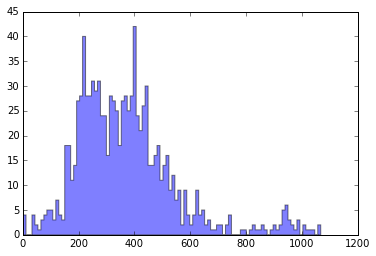

In [48]:
# histogram of crime scores

fig, ax = plt.subplots()

H = ax.hist(crimeindexdf['crime_score'], bins=100, alpha=0.5, histtype='stepfilled')

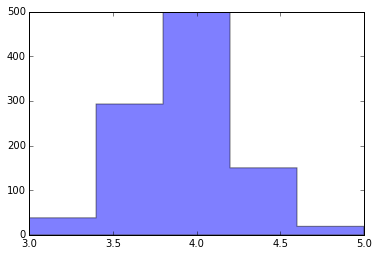

In [49]:
# histogram of ratings

fig, ax = plt.subplots()

H = ax.hist(crimeindexdf['rating'], bins=5, alpha=0.5, histtype='stepfilled')

/Users/Heikal/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


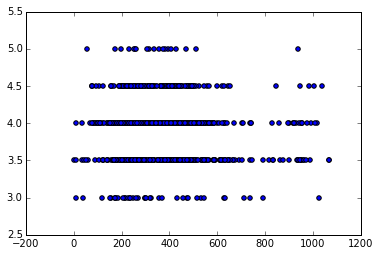

In [50]:
# scatterplot of crime score vs ratings

fig, ax = plt.subplots()
im = ax.scatter(crimeindexdf['crime_score'], crimeindexdf['rating'],  cmap=plt.cm.jet)

In [157]:
#need a way to easily slice across categories

#build list of unique category aliases

unique_cat_alias=[]
for x in yelpdf.cat_alias:
    for y in x:
        unique_cat_alias.append(y)
set(unique_cat_alias)

    

In [51]:
#create function to take in category name as input and creates crime index df for that category as output